In [185]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
%matplotlib inline

**First, let's load Titanic dataset. The dataset description is as below...**

<img src="data.png" style="width:70%; height:70%"/>

### Train Set

In [182]:
data = '/Users/Ming/Documents/Python Projects/titanic/'
train = pd.read_csv(data+'train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Test Set

In [24]:
test = pd.read_csv(data+'test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the info, we can see that there are total 12 variables, with 11 features and 1 labels. All data are available except Age, Cabin and Embarked have null values.

In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the describe, we can see that about 38.38% passengers survived the incident. Passenger age ranged from 0.42 to 80.

In [33]:
missing = ['Age', 'Cabin', 'Embarked']
print('Missing data percentage')
for feature in missing:
    print(feature + ': ', ((len(train)-train[feature].count())/len(train)*100).round(2), '%')

Missing data percentage
Age:  19.87 %
Cabin:  77.1 %
Embarked:  0.22 %


The missing data are below 50%, except for Cabin which is 77.1% and this could be problematic. We might need to consider to remove this features or do imputation. Since Cabin has too high % of missing values and it does not provide much information, I decided to remove this column for now.

In [183]:
train.drop(['Cabin'], axis=1, inplace=True)

In [184]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Check titanic passenger survival rate across age and sex

Text(0.5, 1.0, 'Female Passengers')

Text(0.5, 1.0, 'Male Passengers')

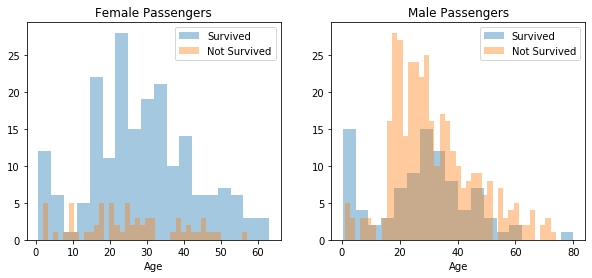

In [169]:
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(10,4))
female = train[train['Sex'] == 'female'].dropna()
male = train[train['Sex'] == 'male'].dropna()
f_survive = female[female['Survived'] == 1]
f_not_survive = female[female['Survived'] == 0]
m_survive = male[male['Survived'] == 1]
m_not_survive = male[male['Survived'] == 0]
ax = sns.distplot(f_survive['Age'], bins=18, label='Survived', ax=axes[0], kde=False)
ax = sns.distplot(f_not_survive['Age'], bins=40, label='Not Survived', ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female Passengers')
ax = sns.distplot(m_survive['Age'], bins=18, label='Survived', ax=axes[1], kde=False)
ax = sns.distplot(m_not_survive['Age'], bins=40, label='Not Survived', ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male Passengers')

The y-axis is the observed values (or count). It seems that female passengers have higher survival rate than male passengers. Besides, most female that survived are between age 15 to 35; while female that not survived are distributed across all age uniformly. As for male, those who were not survived are in the age range of 18 to 40; and those survived are in the age range of 20 to 40. 